# Symptom Classifier Systems

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import re

import pickle
from sklearn import preprocessing
from sklearn.externals import joblib

from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
training = pd.read_csv('data/data.csv')
training.head()

,class,description
0,feature_not_found,feature_not_found
1,หูอักเสบ หูน้ำหนวก,ควรไปหาหมอ ซึ่งจะให้กิน ยาปฏิชีวนะ นาน 10 วัน ...
2,หูอักเสบ หูน้ำหนวก,คัน ระคายเคืองในรูหูส่วนนอก ปวดหู หูอื้อ มีข...
3,หูอักเสบ หูน้ำหนวก,หูชั้นกลางอักเสบเฉียบพลัน ผู้ป่วยมักมีอาการเกิ...
4,เหงือกอักเสบ,แปรงฟันด้วยเกลือวันละ 2-3 ครั้ง และบ้วนปากด้วย...


In [3]:
feature_words = '''
ผม
ขน
เล็บ
ฟัน
หนัง
เนื้อ
เอ็น
กระดูก
ไต
หัวใจ
ตับ
พังผืด
ม้าม
ปอด
ลำไส้
สมอง
เสลด
น้ำเหลือง
เลือด
เหงื่อ
มันข้อ
น้ำตา
มันเหลว
น้ำลาย
น้ำมูก
ข้อ
ขี้
ตา
หู
จมูก
ปาก
ลิ้น
แขน
ขา
คาง
ท้อง
อก
เข่า
มือ
หลัง
เอว
ขา
เท้า
ใจ
ตีน
ตับ
ไต
ปาก
หัว
ศีรษะ
คอ
ใบหน้า
เลือด
เหงือก
ทอนซิล
ไซนัส
เหงื่อ
ผื่น
หวิว
สั่น
แผล
หอบ
เหงื่อ
เหนื่อย
แน่น
หายใจไม่ออก
น้ำหนวก
คัน
เจ็บ
มัว
พร่า
เวียน
มึน
ปวด
ยืน
นั่ง
เดิน
กังวล
เครียด
หงุดหงิด
นอนไม่หลับ
หน้ามืด
อ้วก
อาเจียน
เป็นลม
คลื่นไส้
อักเสบ
เปื่อย
เป็นฝ้า
ไอ
ไข้
หวัด
เจ็บคอ
เสียงแหบ
น้ำหนักลด
ร้อนใน
ขี้ร้อน
คัดจมูก
น้ำมูก
มูก
เลือด
ปัสสาวะ
ปวดแสบ
ท้องเสีย
ผื่น
แผล
พุพอง
หอบ
น้ำหนวก
แฉะ
แดง
กุ้งยิง
บ้านหมุน
บิด
ท้องผูก
ท้องร่วง
'''

In [4]:
features = [f for f in list(set(feature_words.split('\n'))) if f]

In [5]:
def get_symptom_feature(messages):
    features_result = {}
    features_count = 0
    for feature in features:
        pattern = feature
        for message, score in messages:
            matches = pattern in message
            if matches:
                try:
                    features_result[feature] += 1 * score
                except:
                    features_result[feature] = 1 * score
                features_count = features_count + 1
            else:
                try:
                    features_result[feature] = 0 if not features_result[feature] else 1
                except:
                    features_result[feature] = 0
    features_result['feature_not_found'] = 1 if features_count == 0 else 0
    return features_result

In [6]:
data = []
for index, row in training.iterrows():
    features_result = get_symptom_feature([
        (row['class'], 10),
        (row['description'], 1)
    ])
    features_result['symptom_name'] = row['class']
    data.append(features_result)

In [7]:
df = pd.DataFrame(data=data)

In [8]:
df.head()

,feature_not_found,symptom_name,กระดูก,กังวล,กุ้งยิง,ขน,ขา,ขี้,ขี้ร้อน,ข้อ,...,แฉะ,แดง,แน่น,แผล,ใจ,ใบหน้า,ไข้,ไซนัส,ไต,ไอ
0,1,feature_not_found,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,หูอักเสบ หูน้ำหนวก,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,หูอักเสบ หูน้ำหนวก,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,หูอักเสบ หูน้ำหนวก,1,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
4,0,เหงือกอักเสบ,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [9]:
df[df['feature_not_found']==1]

,feature_not_found,symptom_name,กระดูก,กังวล,กุ้งยิง,ขน,ขา,ขี้,ขี้ร้อน,ข้อ,...,แฉะ,แดง,แน่น,แผล,ใจ,ใบหน้า,ไข้,ไซนัส,ไต,ไอ
0,1,feature_not_found,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df.corr()

,feature_not_found,กระดูก,กังวล,กุ้งยิง,ขน,ขา,ขี้,ขี้ร้อน,ข้อ,คลื่นไส้,...,แฉะ,แดง,แน่น,แผล,ใจ,ใบหน้า,ไข้,ไซนัส,ไต,ไอ
feature_not_found,1.000000,-0.018182,-0.022980,-0.025950,-0.032081,-0.042084,-0.050965,-0.018182,-0.037284,-0.029458,...,-0.019786,-0.038909,-0.042220,-3.298183e-02,-0.040480,-0.018182,-0.044933,-0.018182,-0.050965,-0.026163
กระดูก,-0.018182,1.000000,-0.022980,-0.025950,-0.032081,-0.042084,-0.050965,-0.018182,-0.037284,0.036528,...,-0.019786,0.027118,0.430644,-3.298183e-02,0.050195,-0.018182,0.021284,-0.018182,-0.050965,0.065407
กังวล,-0.022980,-0.022980,1.000000,-0.032799,0.013516,0.045007,-0.027607,0.068941,-0.038929,-0.031276,...,-0.025008,-0.049178,-0.053363,-4.168661e-02,0.145303,-0.022980,-0.056792,-0.022980,0.340483,-0.024801
กุ้งยิง,-0.025950,-0.025950,-0.032799,1.000000,-0.045787,-0.060064,0.218218,-0.025950,-0.053214,-0.042044,...,-0.028239,-0.008414,-0.060258,-4.707325e-02,-0.057774,-0.025950,-0.064130,-0.025950,-0.072739,-0.037341
ขน,-0.032081,-0.032081,0.013516,-0.045787,1.000000,0.032367,-0.089924,-0.032081,0.040997,-0.013167,...,-0.034910,-0.029818,-0.074494,-5.819408e-02,0.035235,-0.032081,-0.001391,-0.032081,-0.089924,-0.046162
ขา,-0.042084,-0.042084,0.045007,-0.060064,0.032367,1.000000,-0.045370,0.048558,-0.053972,-0.068184,...,-0.045796,-0.078302,-0.013531,-5.285047e-02,-0.045261,-0.042084,-0.021474,-0.042084,-0.081666,0.045417
ขี้,-0.050965,-0.050965,-0.027607,0.218218,-0.089924,-0.045370,1.000000,0.356753,0.295354,-0.082573,...,-0.018487,-0.029744,0.071007,2.245215e-01,-0.077157,-0.050965,-0.099434,-0.050965,0.020408,-0.036668
ขี้ร้อน,-0.018182,-0.018182,0.068941,-0.025950,-0.032081,0.048558,0.356753,1.000000,-0.037284,-0.029458,...,-0.019786,-0.038909,-0.042220,-3.298183e-02,0.050195,-0.018182,-0.044933,-0.018182,-0.050965,0.065407
ข้อ,-0.037284,-0.037284,-0.038929,-0.053214,0.040997,-0.053972,0.295354,-0.037284,1.000000,0.016074,...,-0.040573,-0.009146,-0.044418,-5.587120e-02,-0.034503,-0.037284,0.008223,-0.037284,-0.031807,-0.053650
คลื่นไส้,-0.029458,0.036528,-0.031276,-0.042044,-0.013167,-0.068184,-0.082573,-0.029458,0.016074,1.000000,...,-0.032057,-0.058761,-0.037760,-5.343716e-02,0.075449,-0.029458,-0.068509,-0.029458,-0.082573,-0.036455


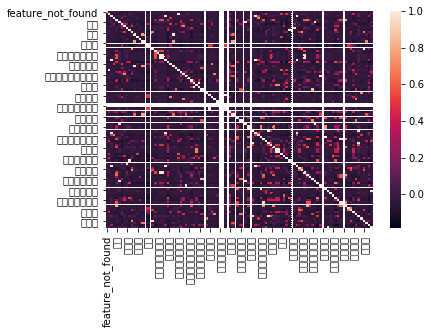

In [11]:
sns.heatmap(df.corr())

In [12]:
xData = df[features]
yData = df['symptom_name']

In [13]:
xData = xData.replace(np.nan, 0)

In [14]:
scaler = preprocessing.StandardScaler(with_mean=True).fit(xData)
xData = scaler.transform(xData)
xData

array([[-0.19245009, -0.35675303, -0.15859556, ..., -0.19245009,
         0.        , -0.23791548],
       [-0.19245009,  0.        , -0.15859556, ..., -0.19245009,
         0.        , -0.23791548],
       [-0.19245009,  0.        , -0.15859556, ..., -0.19245009,
         0.        , -0.23791548],
       ..., 
       [-0.19245009, -0.35675303, -0.15859556, ..., -0.19245009,
         0.        , -0.23791548],
       [-0.19245009, -0.35675303, -0.15859556, ..., -0.19245009,
         0.        , -0.23791548],
       [-0.19245009, -0.35675303, -0.15859556, ..., -0.19245009,
         0.        , -0.23791548]])

In [15]:
pca = PCA()
pca.fit(xData)

xData = pca.transform(xData)
xData

array([[ -8.89048588e-01,   1.38749577e-01,   2.12148355e-01, ...,
          1.50193845e-01,   1.35184193e-01,  -9.70908650e-17],
       [ -1.10626868e+00,   1.86022726e-01,  -1.65902138e-01, ...,
          1.20988609e-01,  -9.58365696e-02,  -3.19135470e-16],
       [ -1.09262833e+00,   1.59227251e-01,  -1.23347118e-01, ...,
         -1.36678145e-01,   9.70633144e-02,  -3.19135470e-16],
       ..., 
       [  1.14876321e+00,   1.39564507e+00,  -5.32963076e-02, ...,
          2.07135668e-04,  -1.32323897e-03,  -7.35469104e-16],
       [  1.35238101e-01,   2.56347235e-01,   1.70680548e-01, ...,
          2.42820304e-03,   4.50447243e-03,  -2.35868743e-16],
       [ -2.76214860e-01,   1.10193186e+00,  -4.32787515e-02, ...,
          5.99524840e-04,  -1.76210183e-03,   2.17886634e-15]])

In [16]:
keyword = 'คัดจมูก มีน้ำมูก'

In [17]:
testData = [get_symptom_feature([(keyword, 100)])]
#print (testData)

# have_features = []
# for t in testData[0]:
#     if testData[0][t] == 0: continue
#     have_features.append(t)
    
# for f in features:
#     corr = []
#     if testData[0][f] == 1: continue
#     for hf in have_features:
#         corr.append(df.corr()[f][hf])
#     testData[0][f] = np.abs(np.average(corr)) if not np.isnan(np.average(corr)) else 0
        
#print (testData)

In [18]:
XTest = pd.DataFrame(data=testData)[features]
XTest = scaler.transform(XTest)
XTest = pca.transform(XTest)

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=10)
model.fit(xData, yData)
model.score(xData, yData)
print(model)

predicted = model.predict(XTest)
print(predicted)

prob_a = model.predict_proba(XTest)[0]
order_a = {}
for i, y in enumerate(model.classes_):
    order_a[prob_a[i]] = y
    
import collections
order_a = collections.OrderedDict(sorted(order_a.items(), reverse=True))
print(list(order_a.items())[:3])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=10, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
['คัดจมูก น้ำมูกไหล']
[(0.28157808736540679, 'คัดจมูก น้ำมูกไหล'), (0.22431682347930995, 'ไซนัสอักเสบ (โพรงจมูกอักเสบ)'), (0.12553768029242346, 'เจ็บคอ')]


In [20]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(xData, yData)
print(model)

predicted = model.predict(XTest)
print(predicted)

prob_a = model.predict_proba(XTest)[0]
order_a = {}
for i, y in enumerate(model.classes_):
    order_a[prob_a[i]] = y
    
import collections
order_a = collections.OrderedDict(sorted(order_a.items(), reverse=True))
print(list(order_a.items())[:3])


GaussianNB(priors=None)
['หูอักเสบ หูน้ำหนวก']
[(1.0, 'หูอักเสบ หูน้ำหนวก'), (0.0, 'ไอ')]


In [21]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(solver='lbfgs')
model.fit(xData, yData)
print(model)

predicted = model.predict(XTest)
print(predicted)

prob_a = model.predict_proba(XTest)[0]
order_a = {}
for i, y in enumerate(model.classes_):
    order_a[prob_a[i]] = y
    
import collections
order_a = collections.OrderedDict(sorted(order_a.items(), reverse=True))
print(list(order_a.items())[:3])


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
['คัดจมูก น้ำมูกไหล']
[(1.0, 'คัดจมูก น้ำมูกไหล'), (4.0239134582614849e-56, 'ไซนัสอักเสบ (โพรงจมูกอักเสบ)'), (9.679194863051066e-85, 'ปากนกกระจอก (มุมปากเปื่อย)')]


In [23]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=1000, learning_rate=10)
model.fit(xData, yData)
print(model)

predicted = model.predict(XTest)
print(predicted)

prob_a = model.predict_proba(XTest)[0]
order_a = {}
for i, y in enumerate(model.classes_):
    order_a[prob_a[i]] = y
    
import collections
order_a = collections.OrderedDict(sorted(order_a.items(), reverse=True))
print(list(order_a.items())[:3])


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=10,
          n_estimators=1000, random_state=None)
['คัดจมูก น้ำมูกไหล']
[(0.045948526693157639, 'คัดจมูก น้ำมูกไหล'), (0.045739694195557797, 'ริดสีดวงตา'), (0.035823581812311676, 'ต่อมทอนซิลอักเสบ (เป็นไข้ เจ็บคอ ต่อมทอนซิลบวมแดง เป็นหนอง)')]
